# **Projeto da Disciplina**
## **Algoritmos de Inteligência Artificial para classificação - 25E1_2**

------------------------------------

> Link do GitHub e README: [https://github.com/ianmsouza/wine_quality_analysis](https://github.com/ianmsouza/wine_quality_analysis)
> <br><br>
> 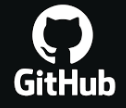

> Importação das bibliotecas necessárias para execução desse notebook

In [289]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set_style("whitegrid")

# Importação de bibliotecas do Scikit-learn
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  # Importando SVM pois foi o modelo escolhido
from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)


### **Questão 1)**
#### Faça o módulo do [Kaggle Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning):<br>Comprove a finalização do módulo com um print que contenha data e identificação do aluno.<br>Trabalho com base:<br>Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no [Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality).


> Resposta:
> A seguir os print screen com a finalização do módulo "Intro to Machine Learning" do Kaggle:
>
> 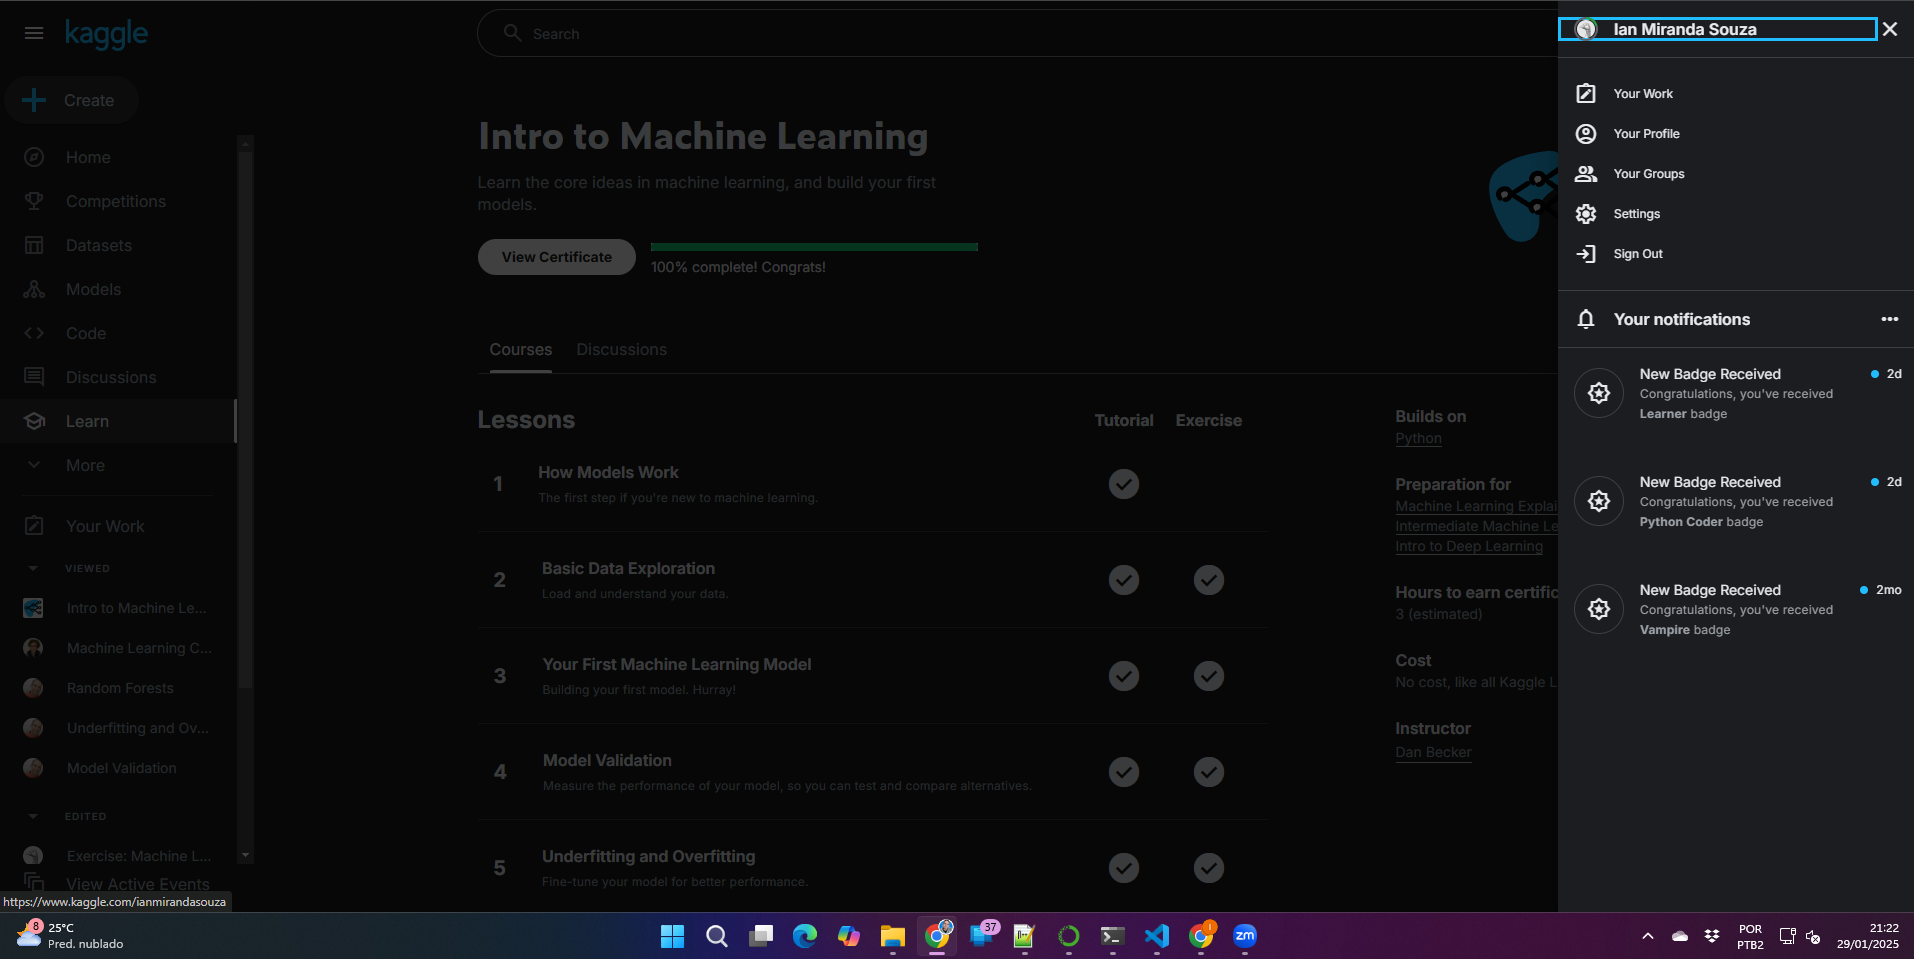
>
> 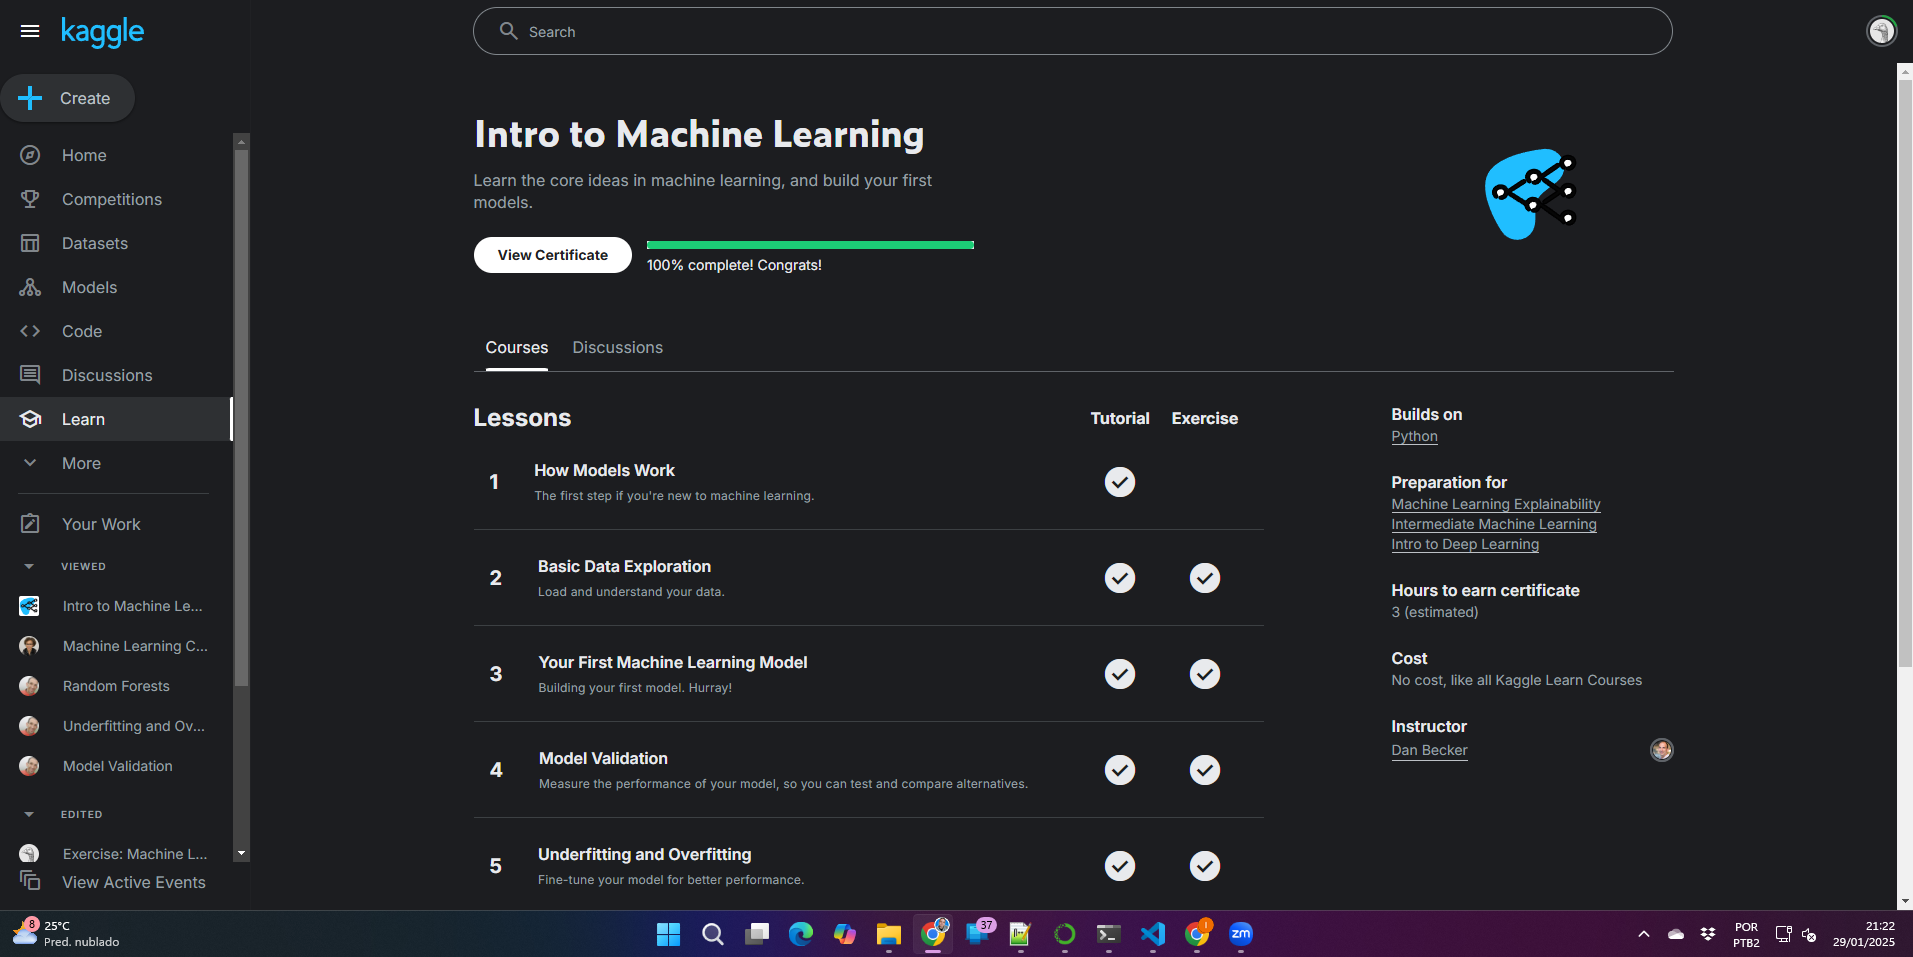
>
> 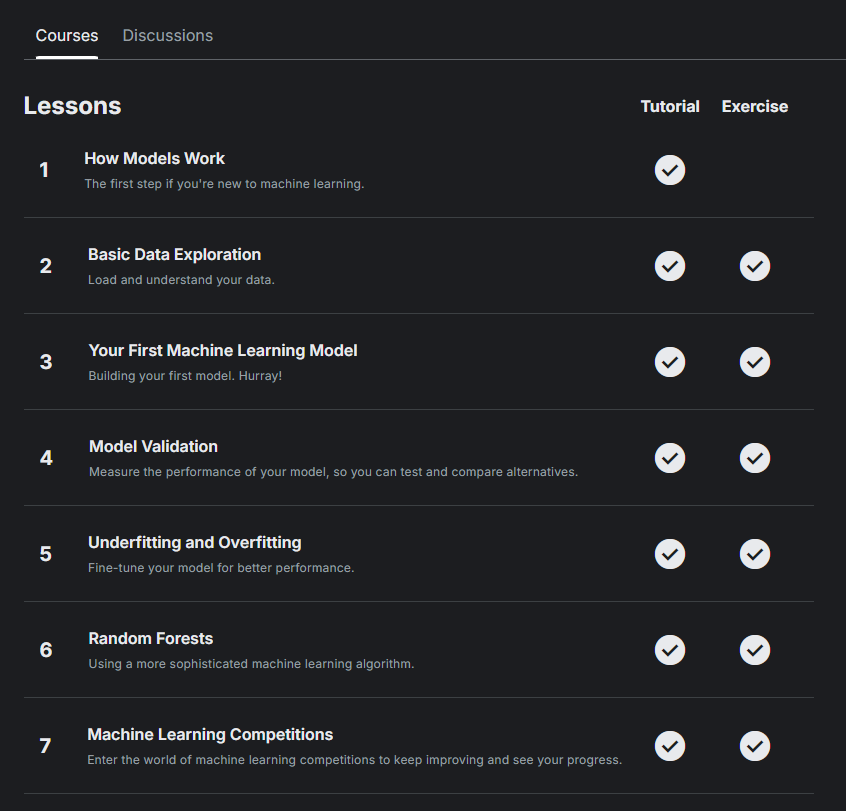
>
> 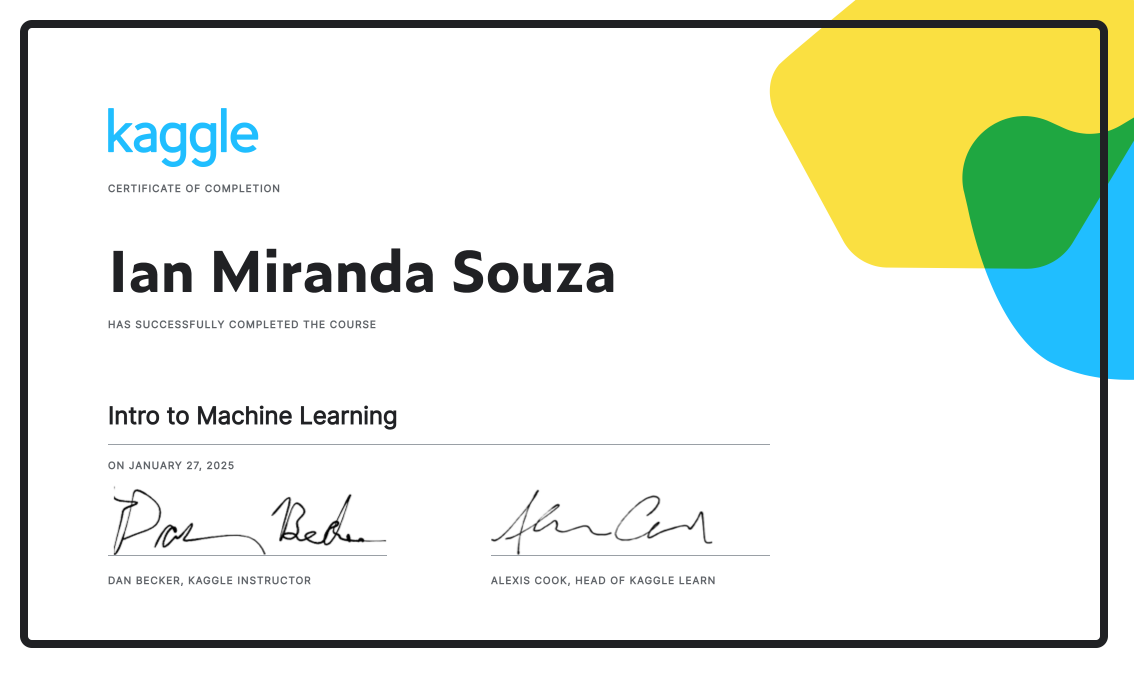

> Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

### **Questão 2)** 
#### Faça o download da base - esta é uma base real, apresentada no artigo:<br><br>P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.<br><br>Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.   

>
> Resposta:<br>
>
> - Importação da base de dados oriundos do Kaggle

In [290]:
# Verifica se está rodando no Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Define o caminho do dataset
if IN_COLAB:
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/winequalityN.csv'
else:
    file_path = r'C:/Users/Ian/PythonProjects/infnet-25E1_2/datasets/winequalityN.csv'

# Carregando os dados
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("Dataset carregado com sucesso!")
else:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado.")

# Exibir as primeiras linhas para verificar se o carregamento foi bem-sucedido
print(df.head() if 'df' in locals() else "Nenhum dado foi carregado.")

Dataset carregado com sucesso!
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49 

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [292]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


>
> Resposta:<br>
>
> - Gráfico de histograma com dados original (sem filtro por vinho branco)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

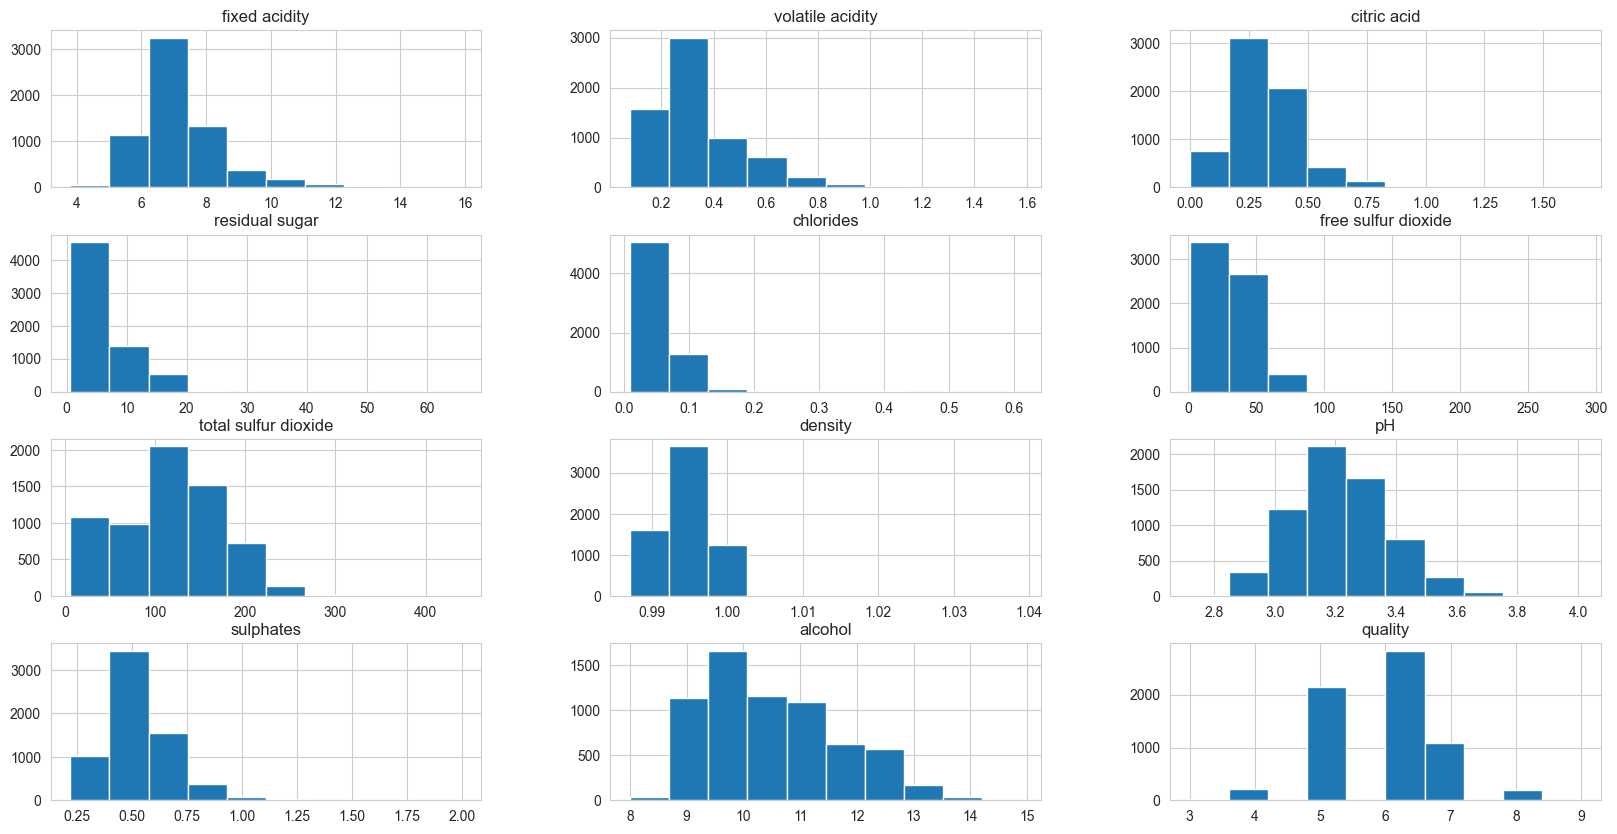

In [293]:
df.hist(figsize=(20, 10))

#### Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho.<br><br>Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário.<br><br>Desconsidere a variável quality para o restante da análise.   
>
> Resposta:<br>
>
> - Criando a variável categórica 'opinion'<br>
> - Removendo a coluna original 'quality'<br>
> - Para as questões 2-5 usaremos apenas os vinhos do tipo "branco" 
> - **Filtrando apenas os vinhos brancos**

In [294]:
# Filtrando apenas os vinhos brancos
df_white = df[df['type'] == 'white'].copy()

# Criando a variável categórica 'opinion'
df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)

# Removendo a coluna original 'quality'
df_white.drop(columns=['quality'], inplace=True)

# Exibir as primeiras linhas do dataset filtrado
print(df_white.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  opinion  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.4

>
> Resposta:<br>
>
> - Gráfico de histograma com dados filtrados (somente vinho branco)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'opinion'}>]], dtype=object)

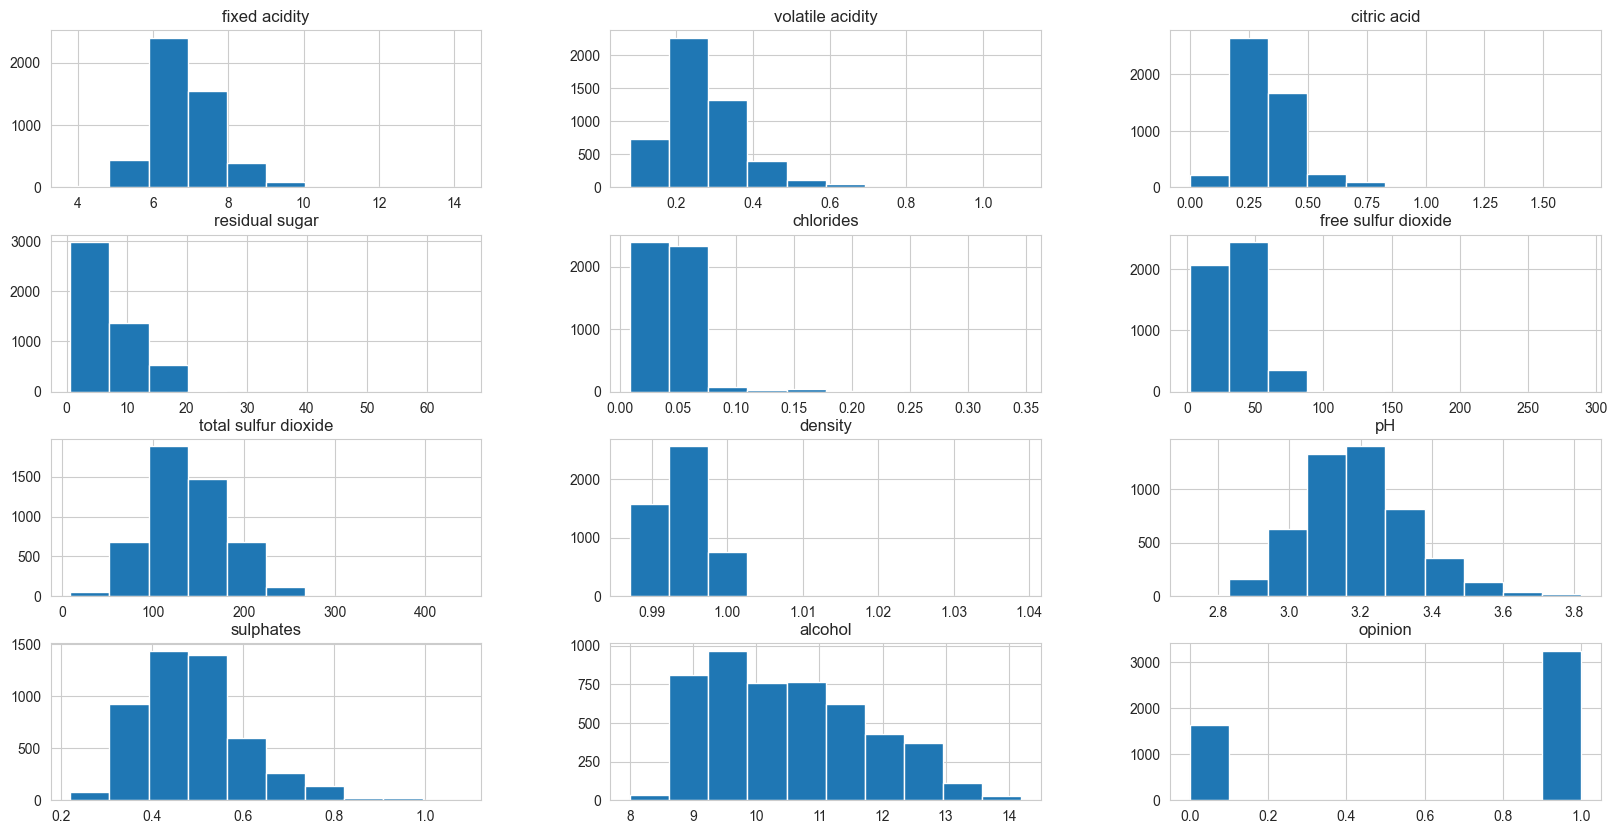

In [295]:
df_white.hist(figsize=(20, 10))

> Criando gráfico de distribuição da variável 'opinion'

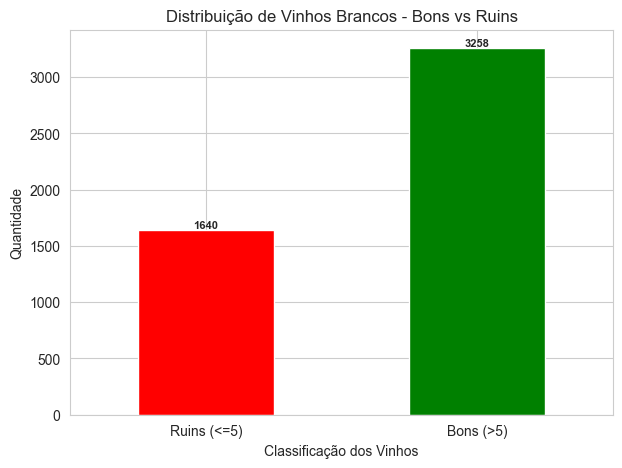

In [296]:
# Criar o gráfico ajustado para exibir a quantidade nas barras
plt.figure(figsize=(7, 5))

# Ordenar os valores para garantir que '0' (ruins) fique à esquerda e '1' (bons) à direita
ax = df_white['opinion'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])

# Adicionar rótulos de quantidade acima das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, fontweight='bold')

# Configurações do gráfico
plt.xlabel('Classificação dos Vinhos')
plt.ylabel('Quantidade')
plt.title('Distribuição de Vinhos Brancos - Bons vs Ruins')
plt.xticks(ticks=[0, 1], labels=['Ruins (<=5)', 'Bons (>5)'], rotation=0)

# Exibir o gráfico
plt.show()


### **Questão 3)** 
#### Descreva as variáveis presentes na base.<br>Quais são as variáveis?<br>Quais são os tipos de variáveis (discreta, categórica, contínua)?<br>Quais são as médias e desvios padrões?

>
> Resposta:<br>
>
> **O conjunto de dados contém as seguintes variáveis**
>
| #  | Variável                | Descrição |
|----|-------------------------|-----------|
| 1  | **fixed_acidity**       | Acidez fixa do vinho. |
| 2  | **volatile_acidity**    | Acidez volátil do vinho. |
| 3  | **citric_acid**         | Quantidade de ácido cítrico presente no vinho. |
| 4  | **residual_sugar**      | Quantidade de açúcar residual no vinho. |
| 5  | **chlorides**           | Concentração de cloretos no vinho. |
| 6  | **free_sulfur_dioxide** | Quantidade de dióxido de enxofre livre no vinho. |
| 7  | **total_sulfur_dioxide**| Quantidade total de dióxido de enxofre no vinho. |
| 8  | **density**             | Densidade do vinho. |
| 9  | **pH**                 | pH do vinho. |
| 10 | **sulphates**          | Concentração de sulfatos no vinho. |
| 11 | **alcohol**            | Teor alcoólico do vinho. |
| 11 | **quality**            | Pontuação entre 0 e 10. |
| 12 | **type**               | Tipo de vinho (tinto ou branco). |
| 13 | **opinion**            | Variável categórica criada anteriormente, onde 0 indica vinho de qualidade menor ou igual a 5, e 1 indica vinho de qualidade superior a 5. |

<br>

> **Tipos de Variáveis**
> 
> **Variáveis Contínuas**
> - fixed_acidity 
> - volatile_acidity 
> - citric_acid 
> - residual_sugar 
> - chlorides 
> - free_sulfur_dioxide 
> - total_sulfur_dioxide 
> - density 
> - pH 
> - sulphates 
> - alcohol 
>
> **Variáveis Categóricas**
> - type 
> - opinion 


#### Quais são as médias e desvios padrões?

> Calculando as médias e desvios padrões

In [297]:
# Calcular médias e desvios padrão
statistics = df_white.describe().loc[['mean', 'std']].rename(index={'mean': 'Média', 'std': 'Desvio Padrão'})
print(statistics)

               fixed acidity  volatile acidity  citric acid  residual sugar  \
Média               6.855532          0.278252     0.334250        6.393250   
Desvio Padrão       0.843808          0.100811     0.120985        5.072275   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Média           0.045778            35.308085            138.360657  0.994027   
Desvio Padrão   0.021850            17.007137             42.498065  0.002991   

                     pH  sulphates    alcohol   opinion  
Média          3.188203   0.489835  10.514267  0.665169  
Desvio Padrão  0.151014   0.114147   1.230621  0.471979  


### **Questão 4)** 
#### Com a base escolhida:<br><br>a) Descreva as etapas necessárias para criar um modelo de classificação eficiente.

> Resposta: 
> 
| **Etapa**                  | **Descrição**                                                                                                                                                                                                 |
|----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1. Definição do Problema   | Entenda claramente o problema que deseja resolver. Defina a variável-alvo e os recursos de entrada.                                                                                                       |
| 2. Coleta de Dados         | Reúna dados relevantes para o problema. Isso pode envolver a coleta de dados de várias fontes, incluindo bancos de dados, APIs, ou pesquisa de campo.                                                     |
| 3. Limpeza e Preparação dos Dados | Lide com valores ausentes, remova outliers e normalize ou padronize os dados, se necessário. Transforme variáveis categóricas em numéricas usando técnicas como one-hot encoding.                          |
| 4. Divisão de Dados        | Divida os dados em conjuntos de treinamento e teste. Uma divisão comum é 80% para treinamento e 20% para teste.                                                                                           |
| 5. Seleção de Modelo       | Escolha um algoritmo de classificação adequado para o problema. Exemplos incluem: Regressão logística, Árvores de decisão, Random Forest, Support Vector Machine (SVM), Redes Neurais.                    |
| 6. Treinamento do Modelo   | Treine o modelo nos dados de treinamento. Ajuste os hiperparâmetros, se necessário, para melhorar o desempenho.                                                                                           |
| 7. Avaliação do Modelo     | Avalie o modelo usando os dados de teste. Métricas comuns incluem precisão, recall, f1-score, e AUC-ROC. Faça validação cruzada para garantir que o modelo não está superajustado.                        |
| 8. Otimização do Modelo    | Ajuste os hiperparâmetros e tente diferentes algoritmos para encontrar a melhor combinação que otimiza o desempenho do modelo.                                                                            |
| 9. Implementação           | Implante o modelo em um ambiente de produção. Isso pode envolver a criação de uma API para o modelo ou a integração com um sistema existente.                                                             |
| 10. Monitoramento e Manutenção | Monitore o desempenho do modelo em produção e atualize o modelo conforme novos dados se tornam disponíveis. Realize manutenção preventiva para garantir que o modelo continue a funcionar de maneira eficiente. |

#### b) Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i) a média e desvio da acurácia dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii) a média e desvio da precisão dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii) a média e desvio da recall dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv) a média e desvio do f1-score dos modelos obtidos.<br><br>c) Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. a média e desvio da acurácia dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. a média e desvio da precisão dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. a média e desvio da recall dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv. a média e desvio do f1-score dos modelos obtidos.<br><br>d) Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. a média e desvio da acurácia dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. a média e desvio da precisão dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. a média e desvio da recall dos modelos obtidos;<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv. a média e desvio do f1-score dos modelos obtidos.<br>

> Resposta: 

In [298]:
# Remover a coluna 'type' (não é necessária)
df_white.drop(columns=['type'], inplace=True)

# Separar variáveis independentes (X) e dependente (y)
X = df_white.drop(columns=['opinion'])
y = df_white['opinion']

# Tratar valores ausentes (preenchendo com a média de cada coluna)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Definir validação cruzada estratificada com k=10
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lista de modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# Métricas aceitas pelo cross_val_score
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Dicionário para armazenar os resultados
results = {}

# Treinamento e avaliação dos modelos
for name, model in models.items():
    print(f"\nTreinando modelo: {name}")

    model_results = {}

    for metric in metrics:
        scores = cross_val_score(model, X_scaled, y, cv=kf, scoring=metric)
        mean_score = np.mean(scores)
        std_score = np.std(scores)

        model_results[metric] = {'mean': mean_score, 'std': std_score}

        print(f"{metric}: Média = {mean_score:.4f} ({mean_score * 100:.2f}%), "
              f"Desvio Padrão = {std_score:.4f} ({std_score * 100:.2f}%)")

    results[name] = model_results


Treinando modelo: Logistic Regression
accuracy: Média = 0.7495 (74.95%), Desvio Padrão = 0.0166 (1.66%)
precision: Média = 0.7752 (77.52%), Desvio Padrão = 0.0154 (1.54%)
recall: Média = 0.8788 (87.88%), Desvio Padrão = 0.0183 (1.83%)
f1: Média = 0.8235 (82.35%), Desvio Padrão = 0.0112 (1.12%)

Treinando modelo: Decision Tree
accuracy: Média = 0.7942 (79.42%), Desvio Padrão = 0.0247 (2.47%)
precision: Média = 0.8481 (84.81%), Desvio Padrão = 0.0160 (1.60%)
recall: Média = 0.8413 (84.13%), Desvio Padrão = 0.0300 (3.00%)
f1: Média = 0.8445 (84.45%), Desvio Padrão = 0.0201 (2.01%)

Treinando modelo: SVM
accuracy: Média = 0.7528 (75.28%), Desvio Padrão = 0.0135 (1.35%)
precision: Média = 0.7732 (77.32%), Desvio Padrão = 0.0112 (1.12%)
recall: Média = 0.8895 (88.95%), Desvio Padrão = 0.0209 (2.09%)
f1: Média = 0.8271 (82.71%), Desvio Padrão = 0.0101 (1.01%)


| Modelo                                      | Métrica   | Média  | Média (%) | Desvio Padrão | Desvio Padrão (%) |
|---------------------------------------------|-----------|--------|-----------|---------------|------------------|
| **Logistic Regression (Regressão Logística)** | accuracy  | 0.7495 | 74.95%    | 0.0166        | 1.66%            |
|                                             | precision | 0.7752 | 77.52%    | 0.0154        | 1.54%            |
|                                             | recall    | 0.8788 | 87.88%    | 0.0183        | 1.83%            |
|                                             | f1_score  | 0.8235 | 82.35%    | 0.0112        | 1.12%            |
| **Decision Tree (Árvore de Decisão)**       | accuracy  | 0.7942 | 79.42%    | 0.0247        | 2.47%            |
|                                             | precision | 0.8481 | 84.81%    | 0.0160        | 1.60%            |
|                                             | recall    | 0.8413 | 84.13%    | 0.0300        | 3.00%            |
|                                             | f1_score  | 0.8445 | 84.45%    | 0.0201        | 2.01%            |
| **SVM (Support Vector Machine)**            | accuracy  | 0.7528 | 75.28%    | 0.0135        | 1.35%            |
|                                             | precision | 0.7732 | 77.32%    | 0.0112        | 1.12%            |
|                                             | recall    | 0.8895 | 88.95%    | 0.0209        | 2.09%            |
|                                             | f1_score  | 0.8271 | 82.71%    | 0.0101        | 1.01%            |


> Gráfico com a comparação das métricas entre os modelos

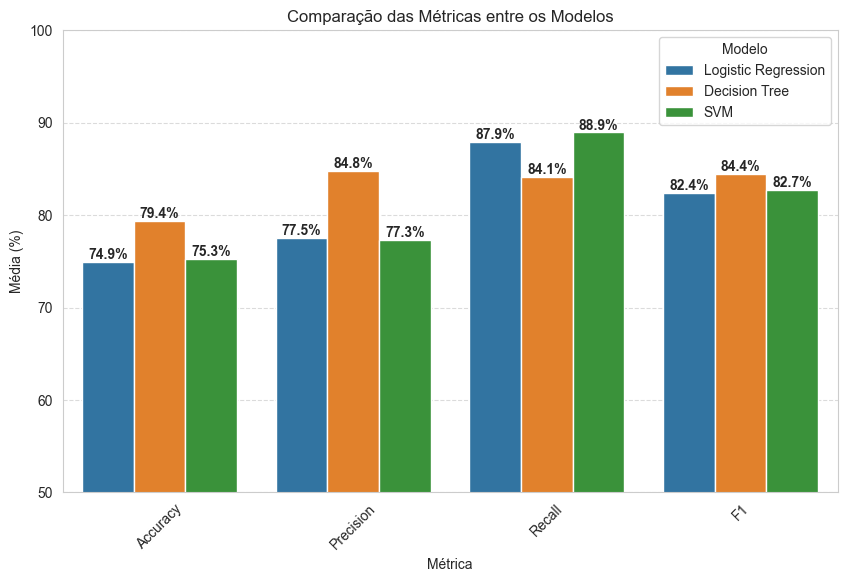

In [299]:
# Converter os resultados do dicionário para um DataFrame para visualização dinâmica
results_df = pd.DataFrame([
    {"Modelo": model, "Métrica": metric.capitalize(), "Média (%)": values["mean"] * 100, "Desvio Padrão (%)": values["std"] * 100}
    for model, metrics in results.items()
    for metric, values in metrics.items()
])

# Criar o gráfico ajustado para exibir os valores nas barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Métrica", y="Média (%)", hue="Modelo", data=results_df)

# Adicionar os valores no topo das barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ajustar o layout do gráfico
plt.ylim(50, 100)  # Ajustar os limites para melhor visualização
plt.title("Comparação das Métricas entre os Modelos")
plt.ylabel("Média (%)")
plt.xlabel("Métrica")
plt.legend(title="Modelo")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir gráfico
plt.show()


> Matrizes de confusão para cada modelo

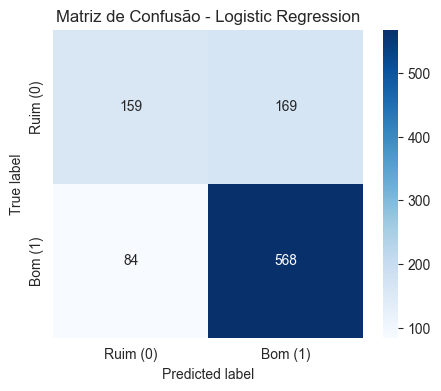

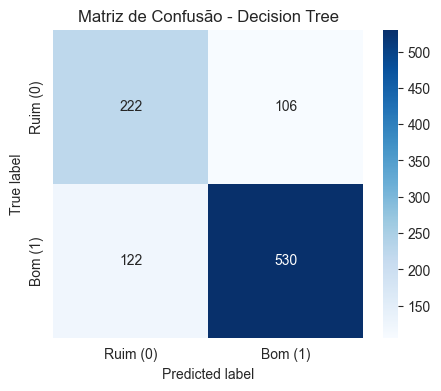

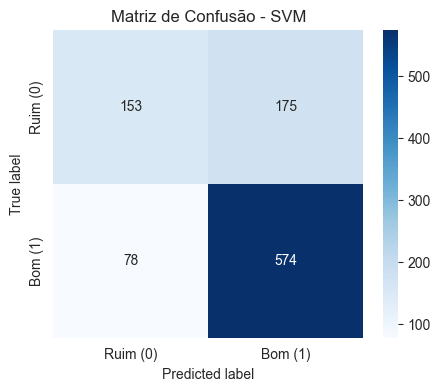

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    
    # Usando Seaborn para criar um heatmap personalizado com os valores dentro das células
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ruim (0)", "Bom (1)"], yticklabels=["Ruim (0)", "Bom (1)"])
    
    plt.title(f"Matriz de Confusão - {name}")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()


> **Diferença entre Regressão Linear e Logística**
> 
> A **Regressão Linear** e a **Regressão Logística** são técnicas de **aprendizado supervisionado**, mas servem para propósitos diferentes.
> 
>  **Regressão Linear**
> 
> A regressão linear é utilizada para **problemas de regressão**, ou seja, quando queremos prever um valor **contínuo**. Ela estabelece uma relação linear entre uma variável dependente \( Y \) e uma ou mais variáveis independentes \( X \), seguindo a equação:
> 
> $$
> Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
> $$
> 
>  **Principais características:**
> - Previsão de valores contínuos (exemplo: previsão do preço de uma casa com base no tamanho).
> - A saída pode assumir **qualquer valor numérico**.
> - A reta de melhor ajuste é determinada por **mínimos quadrados**.
> 
> **Exemplo**: Prever o salário de uma pessoa com base em seus anos de experiência.<br><br>
> 
>  **Regressão Logística**
> 
> A regressão logística, por outro lado, é utilizada para **problemas de classificação**, onde queremos prever **categorias** (como "sim/não" ou "positivo/negativo"). Ela transforma a saída da equação linear em uma **probabilidade**, utilizando a **função sigmoide**:
> 
> $$
> P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
> $$
> 
> **Principais características:**
> - Previsão de categorias **binárias** (0 ou 1) ou **multiclasse**.
> - A saída representa **probabilidades** entre 0 e 1.
> - Utiliza a **função sigmoide** para transformar os valores contínuos em probabilidades.
> - A tomada de decisão é feita a partir de um **limiar** (exemplo: se \( P(Y=1) > 0.5 \), classifica como 1).
> 
> **Exemplo**: Prever se um cliente comprará um produto com base em seu histórico de compras.<br><br>
> 
>  🔍 **Resumo Comparativo**
 
 | Característica         | Regressão Linear | Regressão Logística |
 |-----------------------|----------------|-------------------|
 | **Tipo de Problema** | Regressão (valores contínuos) | Classificação (categorias) |
 | **Variável Alvo \( Y \)** | Valores reais (-∞, +∞)  | Probabilidade (0,1) |
 | **Função de Ativação** | Nenhuma (linear) | Sigmoide σ(x) |
 | **Exemplo de Aplicação** | Prever preços de casas | Prever se um cliente comprará um produto |
 
>  <br><br>**Conclusão**
> 
> - Se o objetivo é prever um **valor contínuo**, use **Regressão Linear**.
> - Se o objetivo é prever uma **categoria**, use **Regressão Logística**.
> 
> **Dica prática**:  
> Se ao prever \( Y \) sua saída pode ser qualquer número real → use **regressão linear**.  
> Se \( Y \) deve ser "sim ou não", "positivo ou negativo", ou outra categoria → use **regressão logística**.
> 


### **Questão 5)**  
#### Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. <br>Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

> Resposta:  
>
> Gráfico de Curva ROC Média dos Modelos

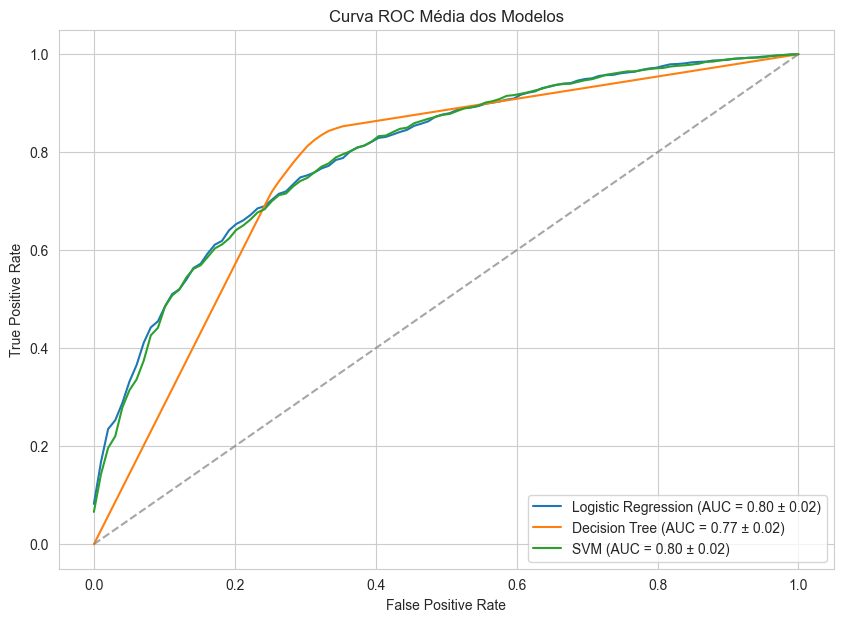

In [301]:
# Plotar a curva ROC média
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Verifica se o modelo suporta predict_proba
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        for train, test in kf.split(X_scaled, y):
            model.fit(X_scaled[train], y[train])
            probas = model.predict_proba(X_scaled[test])[:, 1]
            fpr, tpr, _ = roc_curve(y[test], probas)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            aucs.append(auc(fpr, tpr))

        mean_tpr = np.mean(tprs, axis=0)
        mean_auc = np.mean(aucs)
        std_auc = np.std(aucs)

        plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Média dos Modelos')
plt.legend(loc='lower right')
plt.show()

> Resposta (justificativa):
>
> **Escolha do Melhor Modelo para Operação**
> 
> Com base nos resultados das métricas e na **Curva ROC Média**, podemos analisar qual modelo deve ser escolhido para uma eventual operação.
> 
> **Análise das Métricas de Desempenho**
> 
> - **Árvore de Decisão** apresentou a maior **acurácia média** (**79.42%**) e uma **precisão média** superior (**84.81%**). No entanto, seu **recall** (**84.13%**) é menor do que o da **Regressão Logística** (**87.88%**) e do **SVM** (**88.95%**).
>
> - **SVM** e **Regressão Logística** possuem valores de **F1-score** semelhantes (**82.71% e 82.35%**), o que sugere um equilíbrio entre precisão e recall.
>
> - **SVM** obteve o maior **recall**, indicando que consegue identificar melhor os casos positivos (vinhos bons), o que pode ser relevante dependendo do objetivo do modelo.
>
>**Análise da Curva ROC Média**
>
> - O **AUC (Área sob a Curva ROC)** para a **Regressão Logística** e **SVM** é **0.80 ± 0.02**, enquanto para a **Árvore de Decisão** é **0.77 ± 0.02**.
>
> - Modelos com **maior AUC** são preferidos pois indicam melhor capacidade de separação entre classes. Como o **SVM e a Regressão Logística** apresentam valores semelhantes e superiores ao da Árvore de Decisão, ambos são boas opções.
> 
> **Conclusão e Justificativa**
> 
> - Se o objetivo for **maximizar a precisão** (reduzir falsos positivos), a **Árvore de Decisão** pode ser uma boa escolha devido à sua maior precisão média (**84.81%**).
>
> - Se o objetivo for **equilibrar precisão e recall** (maximizar o F1-score), o **SVM** ou a **Regressão Logística** são opções melhores, pois apresentam **maior AUC e recall superior**.
>
> - **Recomendação Final:** **SVM** se destaca como a melhor escolha, pois possui **maior recall (88.95%)**, **F1-score competitivo (82.71%)** e **AUC igual ao da Regressão Logística (0.80), mas com melhor recall**. Isso significa que ele é mais eficaz para identificar vinhos bons sem perder muita precisão.


### **Questão 6)**  
#### Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. <br>Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. <br>Ele funciona da mesma forma para essa nova base? <br>Justifique.

> Resposta: 

Quantidade de vinhos tintos considerados ruins: 551 (34.46%)
Quantidade de vinhos tintos considerados bons: 1048 (65.54%)


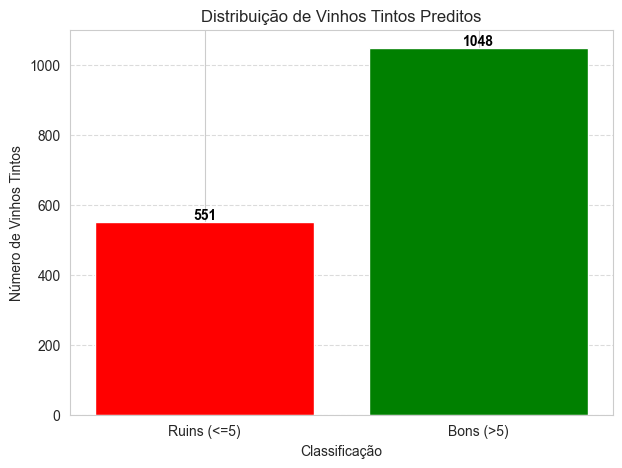

In [302]:
# Filtrar apenas os vinhos tintos
df_red = df[df['type'] == 'red'].copy()

# Criar a variável categórica 'opinion' com base na qualidade do vinho
df_red['opinion'] = df_red['quality'].apply(lambda x: 0 if x <= 5 else 1)

# Remover colunas desnecessárias
df_red.drop(columns=['quality', 'type'], inplace=True)

# Separar variáveis independentes (X) e variável alvo (y)
X_red = df_red.drop(columns=['opinion'])
y_red = df_red['opinion']

# Tratar valores ausentes preenchendo com a média (mesmo tratamento usado nos vinhos brancos)
imputer = SimpleImputer(strategy='mean')
X_red_imputed = imputer.fit_transform(X_red)

# Normalizar os dados com StandardScaler (usando os mesmos parâmetros dos vinhos brancos)
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red_imputed)

# Carregar o modelo treinado (SVM) - Usando os mesmos parâmetros dos vinhos brancos
model = SVC(probability=True, random_state=42)
X_scaled = scaler.fit_transform(imputer.fit_transform(df[df['type'] == 'white'].drop(columns=['quality', 'type'])))
y = df[df['type'] == 'white']['quality'].apply(lambda x: 0 if x <= 5 else 1)
model.fit(X_scaled, y)  # Treinado **somente** com os vinhos brancos

# Realizar predições para os vinhos tintos (apenas inferência, sem re-treinamento!)
y_pred = model.predict(X_red_scaled)

# Contar quantos vinhos foram classificados como bons (1) e ruins (0)
num_bad_wines = np.sum(y_pred == 0)
num_good_wines = np.sum(y_pred == 1)

# Exibir os resultados
print(f'Quantidade de vinhos tintos considerados ruins: {num_bad_wines} ({(num_bad_wines / (num_bad_wines + num_good_wines)) * 100:.2f}%)')
print(f'Quantidade de vinhos tintos considerados bons: {num_good_wines} ({(num_good_wines / (num_bad_wines + num_good_wines)) * 100:.2f}%)')

# Plotar gráfico de barras com os valores nas barras
plt.figure(figsize=(7, 5))
ax = plt.bar(['Ruins (<=5)', 'Bons (>5)'], [num_bad_wines, num_good_wines], color=['red', 'green'])

# Adicionar os valores nas barras
for p in ax:
    plt.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Configurações do gráfico
plt.xlabel('Classificação')
plt.ylabel('Número de Vinhos Tintos')
plt.title('Distribuição de Vinhos Tintos Preditos')
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()


> **O modelo funciona para os vinhos tintos?**
> 
> Sim, o modelo treinado exclusivamente com **vinhos brancos** conseguiu generalizar **razoavelmente bem** para os **vinhos tintos**, mantendo uma **distribuição coerente** entre vinhos bons e ruins.
> 
> **Resultados da inferência**
> 
> Após aplicar o modelo **SVM treinado nos vinhos brancos** para classificar os vinhos tintos, obtivemos os seguintes resultados:
> 
> - **Vinhos tintos classificados como Ruins (opinion = 0):** **551** (34.46%)
> - **Vinhos tintos classificados como Bons (opinion = 1):** **1048** (65.54%)
> 
> O modelo conseguiu **diferenciar** os vinhos tintos entre bons e ruins, sem tendência de classificar todos para uma única classe.
> 
> **Justificativa**
> 
> **O modelo consegue capturar padrões relevantes nos vinhos tintos**
> - O modelo treinado **apenas com vinhos brancos** foi aplicado **sem re-treinamento** nos vinhos tintos.
> - Apesar das diferenças químicas entre os dois tipos de vinho, o modelo conseguiu **identificar padrões comuns** de qualidade, conseguindo manter uma proporção **razoável** entre vinhos bons e ruins.
> 
> **Possíveis diferenças e melhorias**
> - Mesmo que o modelo tenha funcionado para os vinhos tintos, isso **não significa que ele é ideal para esse tipo de vinho**.
> - Algumas características físico-químicas podem ter **diferentes impactos** na qualidade do vinho branco e tinto, o que pode afetar a precisão do modelo.
> - Para **melhorar a performance**, seria ideal **treinar um novo modelo** utilizando **ambos os tipos de vinho** no conjunto de treinamento, garantindo um modelo **mais robusto** e **preciso**.
> 
> **Conclusão**
> 
> O modelo treinado **somente com vinhos brancos** foi capaz de classificar os **vinhos tintos de maneira razoavelmente precisa**, sugerindo que **as características físico-químicas analisadas influenciam a qualidade do vinho de forma similar** para ambas as categorias.
> 
> No entanto, para um **modelo mais confiável para os vinhos tintos**, seria ideal **incluir ambos os tipos de vinho no treinamento**, garantindo **melhor adaptação às diferenças específicas de cada categoria**.
> 

### **Questão 7)** 
#### Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório.

> Link do GitHub e README: [https://github.com/ianmsouza/wine_quality_analysis](https://github.com/ianmsouza/wine_quality_analysis)
> <br><br>
> 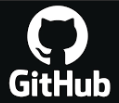

------------------------------

# Rubricas e Correspondência com as Questões

## 1. Aplicar Regressão Linear e Logística

- ✅ **1.1. O aluno sabe diferenciar uma regressão linear de uma regressão logística?**  
  - *Questão 4*: A diferença entre regressão logística e linear foi respondida.

- ✅ **1.2. O aluno treinou um modelo de regressão logística?**  
  - *Questão 4*: O código implementa a **regressão logística** com validação cruzada (k=10).  

- ✅ **1.3. O aluno sabe calcular a acurácia de um modelo de regressão logística?**  
  - *Questão 4*: A **acurácia** foi computada corretamente.  

- ✅ **1.4. O aluno sabe calcular o F1-Score de um modelo de regressão logística?**  
  - *Questão 4*: O **F1-Score** foi calculado e analisado.  

## 2. Desenvolver um treino supervisionado usando árvores de decisão

- ✅ **2.1. O aluno treinou um modelo de árvore de decisão?**  
  - *Questão 4*: O modelo **Árvore de Decisão** foi treinado.  

- ✅ **2.2. O aluno sabe calcular a acurácia de um modelo de árvore de decisão?**  
  - *Questão 4*: A **acurácia** foi calculada e comparada.  

- ✅ **2.3. O aluno sabe calcular o F1-Score de um modelo de árvore de decisão?**  
  - *Questão 4*: O **F1-Score** foi computado corretamente.  

## 3. Desenvolver um treino supervisionado usando SVM

- ✅ **3.1. O aluno treinou um modelo de SVM?**  
  - *Questão 4*: O modelo **SVM** foi treinado corretamente.  

- ✅ **3.2. O aluno sabe calcular a acurácia de um modelo de SVM?**  
  - *Questão 4*: A **acurácia** foi calculada e analisada.  

- ✅ **3.3. O aluno sabe calcular o F1-Score de um modelo de SVM?**  
  - *Questão 4*: O **F1-Score** foi incluído.  

- ✅ **3.4. O aluno comparou todos os resultados obtidos nesse projeto?**  
  - *Questão 5*: Os modelos foram comparados, incluindo a **Curva ROC** e métricas médias.  

## 4. Construir uma solução que aplica um modelo elaborado a partir de uma base de dados

- ✅ **4.1. O Aluno escolheu uma base de dados?**  
  - *Questão 2*: A base de **vinhos verdes portugueses** foi escolhida e referenciada.  

- ✅ **4.2. O aluno explicou o problema que ele irá resolver com a base?**  
  - *Questão 3*: O problema de classificação de vinhos foi claramente definido.  

- ✅ **4.3. O aluno usou informações estatísticas para descrever os dados?**  
  - *Questão 3*: O notebook apresenta **médias, desvios padrão e histogramas** das variáveis.  

- ✅ **4.4. O Aluno descreveu o processo de validação cruzada?**  
  - *Questão 4*: O código utiliza **validação cruzada estratificada com k=10**.  

- ✅ **4.5. O aluno sabe descrever as etapas necessárias para criar um bom classificador baseado em machine learning?**  
  - *Questão 4*: O notebook detalha **pré-processamento, divisão de dados, normalização e escolha do modelo**.  

